In [22]:
"""
Author        : Aditya Jain
Date Started  : October 10, 2022
About         : Testing image cropping for training and padding during evaluation; making images square to avoid distortion
"""
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
import torch
import json
import numpy as np

image_path   = 'moth1.jpg'

#### Loading original image

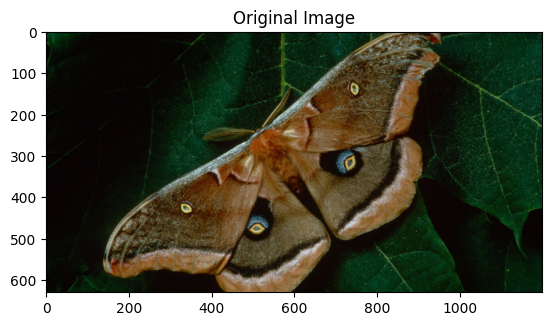

In [23]:
# image loading and processing
image     = Image.open(image_path)
plt.title('Original Image')
plt.imshow(image)
plt.savefig('original_image.png')

#### Resizing original image directly

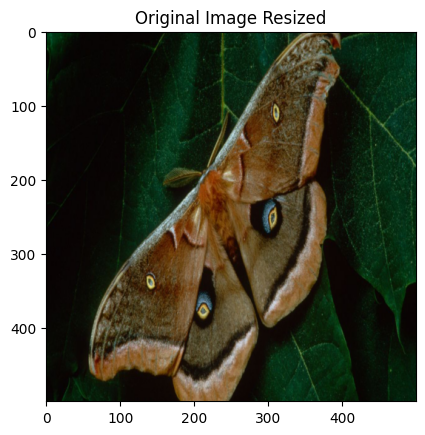

In [24]:
transform = transforms.Resize((500, 500))
img_resized = transform(image)
plt.title('Original Image Resized')
plt.imshow(img_resized)
plt.savefig('original_image_resized.png')

#### Center Cropping and then resizing


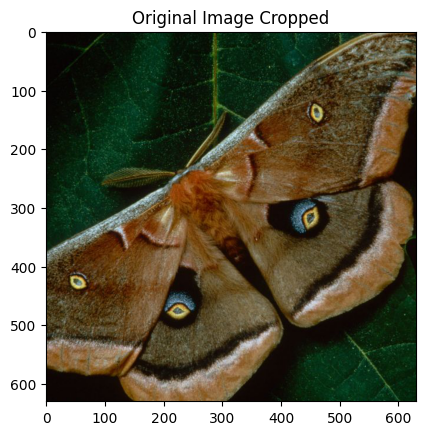

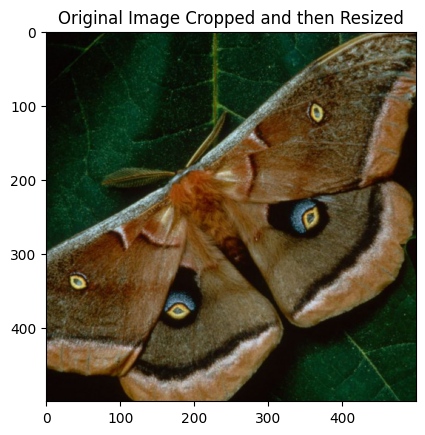

In [29]:
transform1 = transforms.CenterCrop((min(image.size), min(image.size)))
transform2 = transforms.Resize((500, 500))
img_cropped = transform1(image)
plt.figure()
plt.title('Original Image Cropped')
plt.imshow(img_cropped)
plt.savefig('original_image_cropped.png')

plt.figure()
img_cropped_resized = transform2(img_cropped)
plt.title('Original Image Cropped and then Resized')
plt.imshow(img_cropped_resized)
plt.savefig('original_image_cropped_resized.png')